### 构建多变量线性回归神经网络

加载自定义数据：

In [1]:
import pandas as pd
import torch
data = pd.read_csv("data/myData/data_2d.csv")
X = torch.tensor(data.iloc[1, 1:3]).float()
x_mean = data["X"].mean()
y_mean = data["Y"].mean()
z_mean = data["Z"].mean()
x_std = data["X"].std()
y_std = data["Y"].std()
z_std = data["Z"].std()

In [2]:
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
def transform(data):
    data[0] = (data[0] - x_mean)/x_std
    data[1] = (data[1] - y_mean)/y_std
    return data

def target_transform(data):
    data[0] = (data[0] - z_mean)/z_std
    return data


class CustomDataset(Dataset):
    def __init__(self, file, transform=None, target_transform=None):
        self.data = pd.read_csv(file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = torch.tensor(self.data.iloc[idx, 1:3]).float()
        Y = torch.tensor([self.data.iloc[idx, 3]]).float()
        if self.transform:
            X = self.transform(X)
        if self.target_transform:
            Y = self.target_transform(Y)
        return X, Y


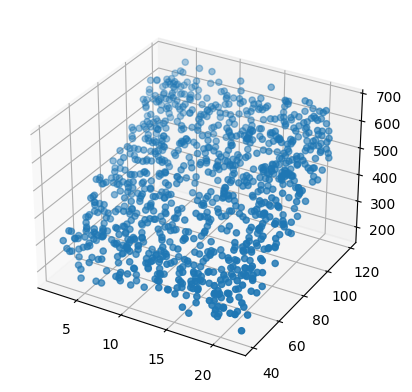

In [3]:
training_data = CustomDataset("data/myData/data_2d.csv",transform=transform,target_transform=target_transform)
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(training_data.data["X"], training_data.data["Y"], training_data.data["Z"])

In [4]:
import torch
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


#### 定义类

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2, 1)  # 输入维度为 2，输出维度为 1

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

#### 损失函数
- nn.MSELoss：均方误差损失函数，用于回归任务。  
- nn.CrossEntropyLoss：交叉熵损失函数，用于多分类任务。  
- nn.BCELoss：二元交叉熵损失函数，用于二分类任务。  
- nn.NLLLoss：负对数似然损失函数，通常用于文本分类任务。  
- nn.KLDivLoss：KL 散度损失函数，用于计算两个概率分布之间的距离。  
- nn.SmoothL1Loss：平滑 L1 损失函数，与均方误差损失函数类似，但对离群值的惩罚更小，适用于回归任务。

In [6]:
#将模型添加到GPU
model = NeuralNetwork().to(device)
# 定义损失函数和优化器
# 均方差
criterion = torch.nn.MSELoss()
# 随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# model.parameters()用于返回模型中所有可训练的参数

训练模型

In [7]:
num_epochs = 2
loss_arr = []
for epoch in range(num_epochs):
        #模型进入训练模式
        model.train()
        #遍历数据
        for batch, (inputs, targets) in enumerate(train_dataloader):
                #将数据添加到GPU
                inputs, targets = inputs.to(device), targets.to(device)
                # 前向传播
                pred = model(inputs)
                # loss计算
                loss = criterion(pred, targets)
                # 梯度清零
                optimizer.zero_grad()
                # 反向传播
                loss.backward()
                # 更新参数的值
                optimizer.step()
                # 输出数据
                print('迭代: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
                loss_arr.append(loss.item())

迭代: [1/2], Loss: 1.7027
迭代: [1/2], Loss: 3.1061
迭代: [1/2], Loss: 1.4535
迭代: [1/2], Loss: 2.4942
迭代: [1/2], Loss: 1.3419
迭代: [1/2], Loss: 1.3434
迭代: [1/2], Loss: 1.4883
迭代: [1/2], Loss: 0.8915
迭代: [1/2], Loss: 2.2895
迭代: [1/2], Loss: 1.0037
迭代: [1/2], Loss: 0.9803
迭代: [1/2], Loss: 1.6419
迭代: [1/2], Loss: 1.8857
迭代: [1/2], Loss: 1.8184
迭代: [1/2], Loss: 2.0983
迭代: [1/2], Loss: 0.7988
迭代: [1/2], Loss: 0.9159
迭代: [1/2], Loss: 1.3387
迭代: [1/2], Loss: 0.9386
迭代: [1/2], Loss: 1.7538
迭代: [1/2], Loss: 1.0139
迭代: [1/2], Loss: 1.0516
迭代: [1/2], Loss: 1.5699
迭代: [1/2], Loss: 1.1996
迭代: [1/2], Loss: 1.1096
迭代: [1/2], Loss: 0.8477
迭代: [1/2], Loss: 0.8776
迭代: [1/2], Loss: 0.6385
迭代: [1/2], Loss: 0.5675
迭代: [1/2], Loss: 0.9513
迭代: [1/2], Loss: 0.7837
迭代: [1/2], Loss: 0.4706
迭代: [1/2], Loss: 0.3263
迭代: [1/2], Loss: 0.7089
迭代: [1/2], Loss: 0.4531
迭代: [1/2], Loss: 0.6706
迭代: [1/2], Loss: 0.5960
迭代: [1/2], Loss: 0.5132
迭代: [1/2], Loss: 0.3053
迭代: [1/2], Loss: 0.4108
迭代: [1/2], Loss: 0.4064
迭代: [1/2], Loss:

#### 可视化loss

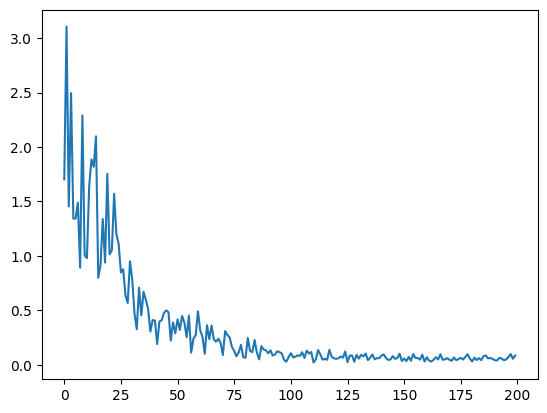

In [8]:
plt.plot(loss_arr)

#### 测试代码
测试数据的dataSet

In [9]:
import numpy as np
class PredDataset(Dataset):
    def __init__(self, transform=None):
        u = np.linspace(0, 20, 100)
        v = np.linspace(40, 120, 100)
        self.XM, self.YM = np.meshgrid(u, v)
        NXM = self.XM.reshape(-1,1)
        NYM = self.YM.reshape(-1,1)
        self.data = np.concatenate((NXM,NYM),axis=1)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = torch.tensor(self.data[idx]).float()
        if self.transform:
            X = self.transform(X)
        return X
pred_data = PredDataset(transform=transform)
pred_dataloader = DataLoader(pred_data, batch_size=len(pred_data), shuffle=False)

测试：

In [10]:
def test(dataloader, model):
    model.eval()
    with torch.no_grad():
        for X in dataloader:
            X = X.to(device)
            pred = model(X)
            return pred
plot_z = test(pred_dataloader,model)
#结果反标准化
plot_z = plot_z * z_std + z_mean
plot_z = plot_z.reshape(100,100)

#### 结果可视化

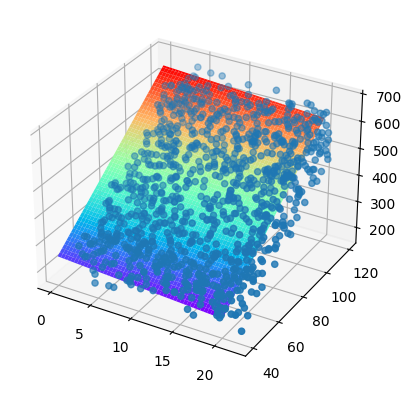

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(training_data.data["X"], training_data.data["Y"], training_data.data["Z"])
w,b=model.parameters()
XM = pred_data.XM
YM = pred_data.YM
ax.plot_surface(XM, YM, plot_z.cpu(), cmap='rainbow')
plt.show()